In [2]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [3]:
df = pd.read_csv('E:\Projects\Bank Customer Churn Prediction\Churn_Modelling.csv')

In [4]:
# Encode categorical variables
le_geo = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

In [5]:
# Features 
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
            'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = df[features]
y = df['Exited']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# Create Tkinter UI
def predict():
    try:
        input_data = [
            int(entry_credit.get()),
            le_geo.transform([geo_var.get()])[0],
            le_gender.transform([gender_var.get()])[0],
            int(entry_age.get()),
            int(entry_tenure.get()),
            float(entry_balance.get()),
            int(entry_products.get()),
            int(has_card_var.get()),
            int(is_active_var.get()),
            float(entry_salary.get())
        ]
        pred = model.predict([input_data])[0]
        result = "Customer will Churn" if pred == 1 else "Customer will Stay"
        messagebox.showinfo("Prediction Result", result)
        show_graphs(input_data)
    except Exception as e:
        messagebox.showerror("Error", str(e))

c:\Users\HP\anaconda33\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


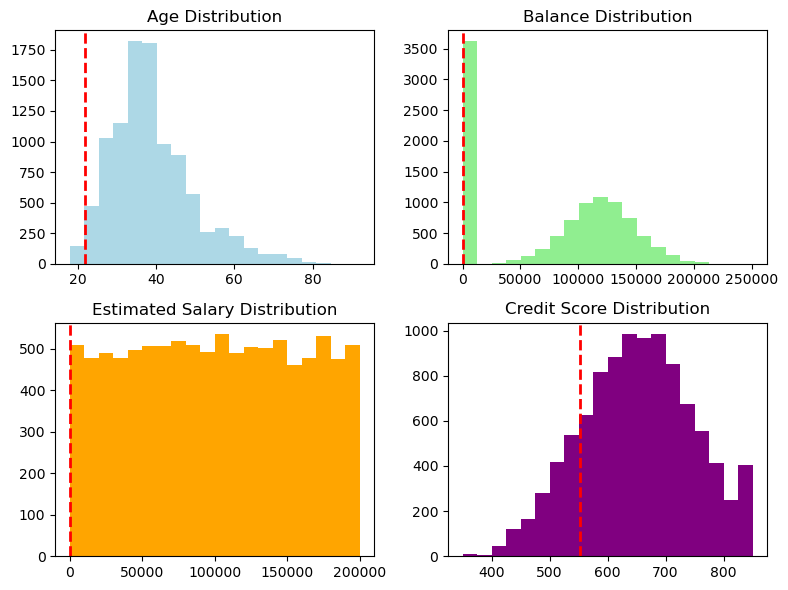

In [10]:
# Function to display graphs
def show_graphs(input_data):
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    # Age distribution
    axs[0, 0].hist(df['Age'], bins=20, color='lightblue')
    axs[0, 0].axvline(input_data[3], color='red', linestyle='dashed', linewidth=2)
    axs[0, 0].set_title('Age Distribution')

    # Balance distribution
    axs[0, 1].hist(df['Balance'], bins=20, color='lightgreen')
    axs[0, 1].axvline(input_data[5], color='red', linestyle='dashed', linewidth=2)
    axs[0, 1].set_title('Balance Distribution')

    # Estimated Salary distribution
    axs[1, 0].hist(df['EstimatedSalary'], bins=20, color='orange')
    axs[1, 0].axvline(input_data[9], color='red', linestyle='dashed', linewidth=2)
    axs[1, 0].set_title('Estimated Salary Distribution')

    # Credit Score distribution
    axs[1, 1].hist(df['CreditScore'], bins=20, color='purple')
    axs[1, 1].axvline(input_data[0], color='red', linestyle='dashed', linewidth=2)
    axs[1, 1].set_title('Credit Score Distribution')

    plt.tight_layout()

    # Embed the plot in Tkinter
    for widget in graph_frame.winfo_children():
        widget.destroy()

    canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

root = tk.Tk()
root.title("Churn Prediction System")

input_frame = tk.Frame(root)
input_frame.pack(side=tk.LEFT, padx=10, pady=10)

graph_frame = tk.Frame(root)
graph_frame.pack(side=tk.RIGHT, padx=10, pady=10)

# CreditScore
tk.Label(input_frame, text="Credit Score").grid(row=0, column=0)
entry_credit = tk.Entry(input_frame)
entry_credit.grid(row=0, column=1)

# Geography
geo_var = tk.StringVar(input_frame)
geo_var.set('France')
tk.Label(input_frame, text="Geography").grid(row=1, column=0)
tk.OptionMenu(input_frame, geo_var, *le_geo.classes_).grid(row=1, column=1)

# Gender
gender_var = tk.StringVar(input_frame)
gender_var.set('Male')
tk.Label(input_frame, text="Gender").grid(row=2, column=0)
tk.OptionMenu(input_frame, gender_var, *le_gender.classes_).grid(row=2, column=1)

# Age
tk.Label(input_frame, text="Age").grid(row=3, column=0)
entry_age = tk.Entry(input_frame)
entry_age.grid(row=3, column=1)

# Tenure
tk.Label(input_frame, text="Tenure").grid(row=4, column=0)
entry_tenure = tk.Entry(input_frame)
entry_tenure.grid(row=4, column=1)

# Balance
tk.Label(input_frame, text="Balance").grid(row=5, column=0)
entry_balance = tk.Entry(input_frame)
entry_balance.grid(row=5, column=1)

# Num of Products
tk.Label(input_frame, text="Num of Products").grid(row=6, column=0)
entry_products = tk.Entry(input_frame)
entry_products.grid(row=6, column=1)

# Has Credit Card
has_card_var = tk.IntVar()
tk.Checkbutton(input_frame, text="Has Credit Card", variable=has_card_var).grid(row=7, column=0, columnspan=2)

# Is Active Member
is_active_var = tk.IntVar()
tk.Checkbutton(input_frame, text="Is Active Member", variable=is_active_var).grid(row=8, column=0, columnspan=2)

# Estimated Salary
tk.Label(input_frame, text="Estimated Salary").grid(row=9, column=0)
entry_salary = tk.Entry(input_frame)
entry_salary.grid(row=9, column=1)

# Predict Button
tk.Button(input_frame, text="Predict", command=predict).grid(row=10, column=0, columnspan=2, pady=10)

root.mainloop()